In [39]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 6)

In [40]:
iris.data.shape

(150, 4)

In [41]:
knn.fit(iris['data'],iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [42]:
iris['target'].shape

(150,)

In [43]:
import numpy as np
X_new =np.array([[5.6, 2.8,3.9,1.1],
                [5.7,2.6,3.8,1.3],
                [4.7,3.2,1.3,0.2]])
prediction= knn.predict(X_new)
X_new.shape

(3, 4)

In [44]:
print ('predicted classes', prediction)

predicted classes [1 1 0]


In [45]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


1) In classification accuracy is a commonly used metric. Accuracy is defined as the number of correct predictions divided by no of total data points. So now arises a question as to which data should be used to calculate accuracy. What we are really interested in is how well our model performs on new data i.e the samples the algorithm has never seen before.

2) Well we could compute the accuracy on data used to fit classifier.  But since the same data was used to train the model the classifier model will not be able to generalize for new data. So for this reason we divide the data into sets- Training Set and Testing Set. 

3) We fit/train the classifier on the training set.

4) Then make predictions on the labelled test set

5) Then compare the predictions with the known labels

6) Finally Compute the accuracy of these predictions


In [46]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 8)
from sklearn.model_selection import train_test_split
X = iris['data']
y= iris['target']
X_train, X_test, y_train,y_test = train_test_split(X ,y, test_size =0.3, random_state =21, stratify =y)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [47]:
y_pred = knn.predict(X_test)
print('predictions', y_pred)

predictions [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [48]:
knn.score(X_test, y_test)

0.9555555555555556

1) Larger k value = smoother decision boundary =less complex model

2) smaller k value = more complex model = can lead to overfitting.

The complex model are generally  have the risk to be sensitive to noise/outliers rather than reflecting general trends in data.
But further increasing the values of k leads to underfitting of the data.

let us now plot a graph determining the accuracy of our model on the training and testing set

In [49]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

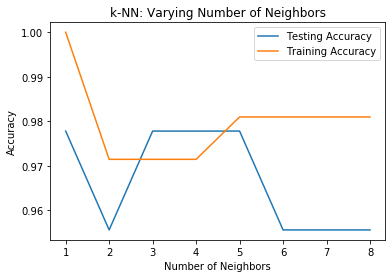

In [50]:
import matplotlib.pyplot as plt
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()